<a href="https://colab.research.google.com/github/sapkotasriyas/MachineLearning/blob/main/Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
len(df[df['Outcome']==1]), len(df[df['Outcome']==0])

(268, 500)

In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It does not make sense to have a zero BloodPressure, SkinThickness, Insulin, BMI and Glucose level. We will just replace them with Not a Number (NaN).

In [5]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print(f"The null data after replacing 0 with NaN are: ", df.isnull().sum())

The null data after replacing 0 with NaN are:  Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Text(0.5, 1.0, 'Correlation')

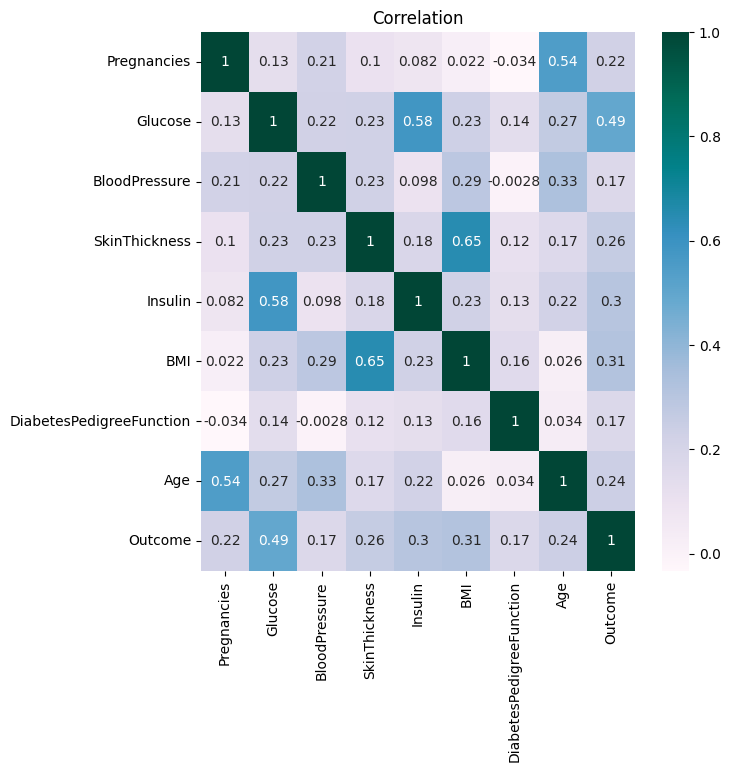

In [8]:
corr = df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr, cmap = 'PuBuGn', annot = True)
plt.title("Correlation")

To fill the data with correct values, let's see if they are normal or skewed.

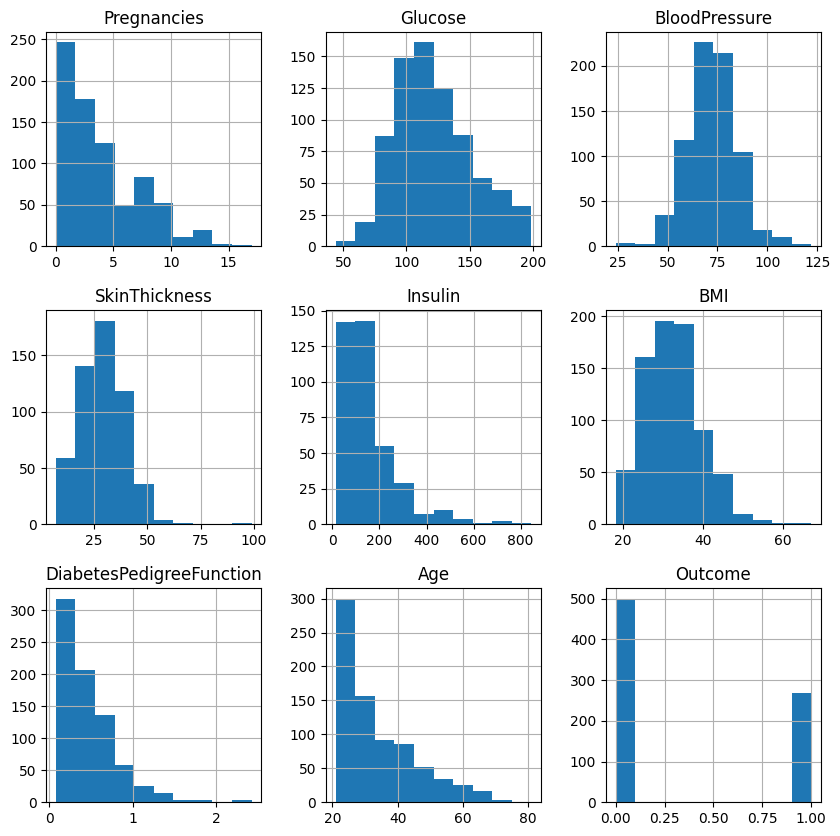

In [9]:
df_plot = df.hist(figsize = (10,10))

From the data, we can observe out of the five that needs to have NaN replaced, Glucose, and BloodPressure have normal distribution, while the remaining three, namely BMI, Insulin and SkinThickness, are skewed to the left. So, we will fill the normal distribution with mean, and skewed data with median.

In [10]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)

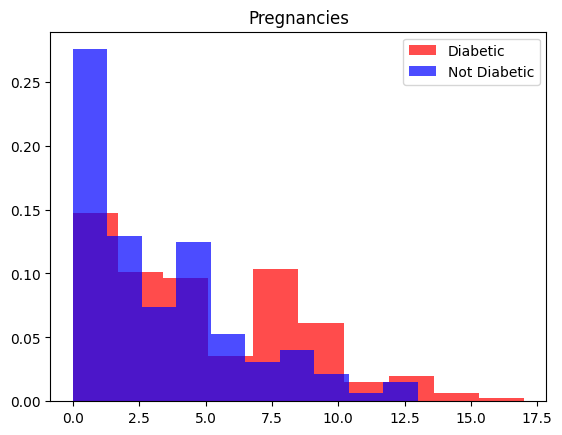

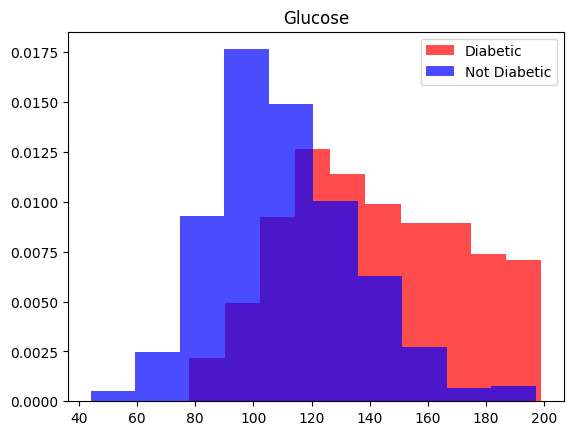

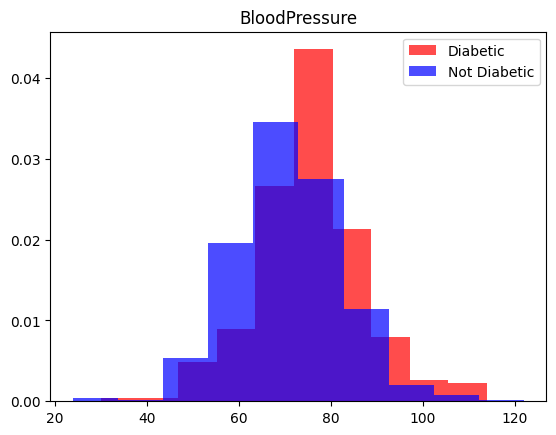

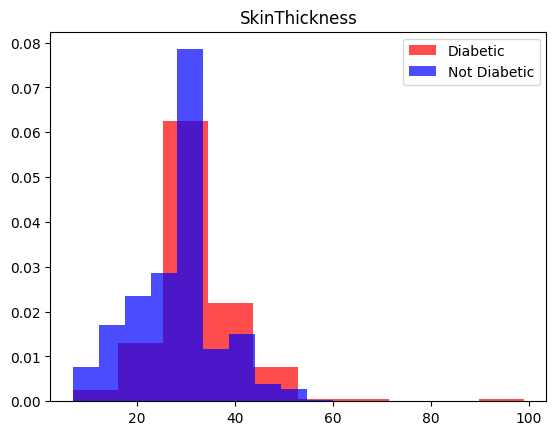

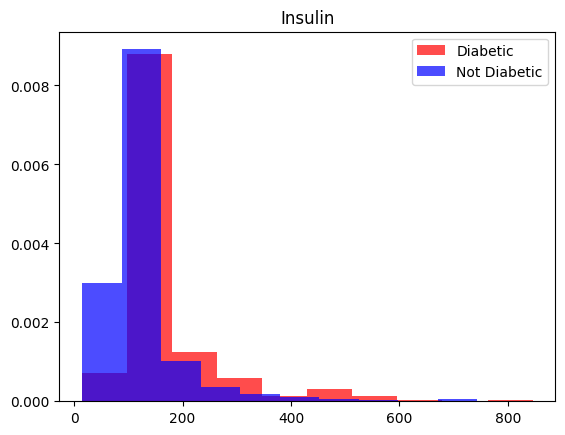

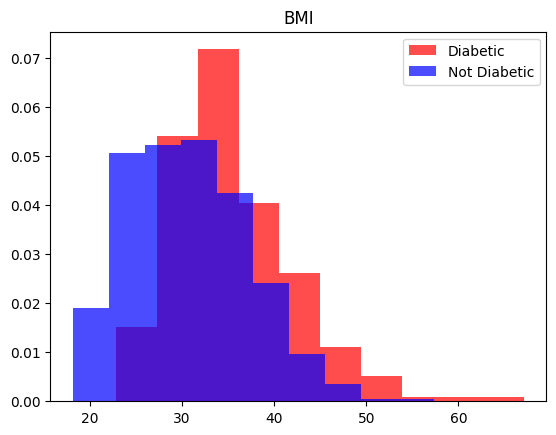

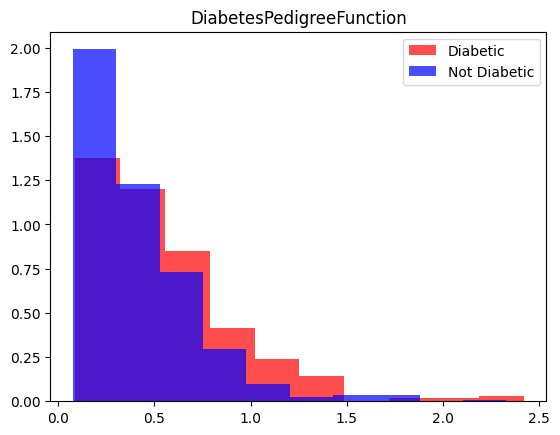

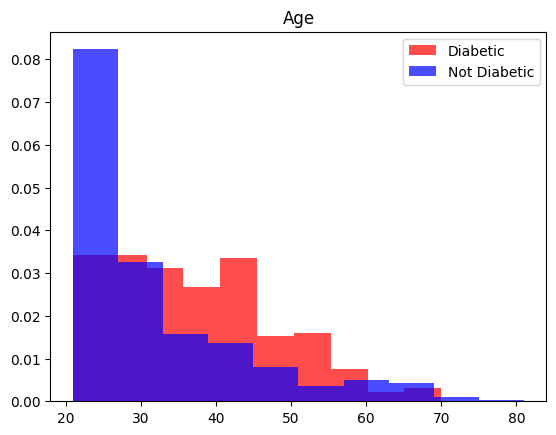

In [11]:
for i in df.columns[:-1]:
  plt.hist(df[df['Outcome'] == 1][i], color = 'red', label = 'Diabetic', alpha = 0.7, density = True)
  plt.hist(df[df['Outcome'] == 0][i], color = 'blue', label = 'Not Diabetic', alpha = 0.7, density = True)
  plt.title(i)
  plt.legend()
  plt.show()

The discrepancy between the size of Diabetic and Not Diabetic data is messing our analysis, so we are gonna scale our data.

In [12]:
sc = StandardScaler()
X = sc.fit_transform(df[df.columns[:-1]].values)
y = df[df.columns[-1]].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state = 42)

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
knn_pred = knn.predict(X_test)

In [58]:
print(f"The accuracy score of KNeighbors is: ", round(accuracy_score(knn_pred, y_test), 2))

The accuracy score of KNeighbors is:  0.75


In [59]:
print("The classification report of KNeighbors is: ", classification_report(knn_pred, y_test))

The classification report of KNeighbors is:                precision    recall  f1-score   support

           0       0.81      0.81      0.81       206
           1       0.62      0.62      0.62       102

    accuracy                           0.75       308
   macro avg       0.71      0.71      0.71       308
weighted avg       0.75      0.75      0.75       308



In [60]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [61]:
lr_pred = lr.predict(X_test)

In [62]:
print(f"The accuracy score of KNeighbors is: ", round(accuracy_score(lr_pred, y_test), 2))

The accuracy score of KNeighbors is:  0.77
